<a href="https://colab.research.google.com/github/anisagar123/IOTEDU/blob/main/Analysis_of_dataset3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
home=pd.read_csv('/content/drive/MyDrive/HomeC.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
home.head(5)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [ ]:
home.tail(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503901,1452128301,1.537383,0.003183,1.537383,0.000133,0.021683,0.642733,0.042033,0.005283,0.008333,0.013517,0.000500,0.000183,0.000017,0.032017,0.000983,0.003750,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503902,1452128302,1.551817,0.003200,1.551817,0.000050,0.056200,0.624783,0.041750,0.005250,0.008450,0.013483,0.000450,0.000133,0.000033,0.032117,0.001000,0.003800,0.001000,0.003200,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503903,1452128303,1.599617,0.003217,1.599617,0.000067,0.089217,0.638650,0.041750,0.005617,0.008467,0.013450,0.000483,0.000117,0.000017,0.032167,0.000983,0.003783,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503904,1452128304,1.608867,0.003217,1.608867,0.000033,0.114300,0.623283,0.041817,0.005217,0.008350,0.013433,0.000467,0.000117,0.000033,0.032283,0.001017,0.003800,0.001017,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,0.000467,0.000150,0.000017,0.032283,0.000983,0.003800,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.000950,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.001000,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.000950,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.000950,0.003767,0.000950,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [ ]:
#new daterange in increments of minutes
time_index = pd.date_range('2016-01-01 05:00', periods=len(home),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
home['time']=time_index


In [ ]:

home.columns=['time', 'use', 'gen', 'House overall', 'Dishwasher',
       'Furnace 1', 'Furnace 2', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well',
       'Microwave', 'Living room', 'Solar', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability']

In [ ]:
home['gen'].head()
home['Solar'].head()
(home['gen']-home['Solar']).value_counts()
(home['House overall']-home['use']).value_counts()


0.0    503910
dtype: int64

In [ ]:
home=home.drop('House overall',axis=1)

In [ ]:
home['day']=home['time'].dt.day
home['month']=home['time'].dt.month
home['week']=home['time'].dt.week
home['hour']=home['time'].dt.hour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import seaborn as sns
def visualize(label, cols):
    fig,ax=plt.subplots(figsize=(14,8))
    colour= ['red','green','blue','yellow']
    for colour,col in zip(colour,cols):
            home.groupby(label)[col].mean().plot(ax=ax,label=col,color=colour)
    plt.legend()


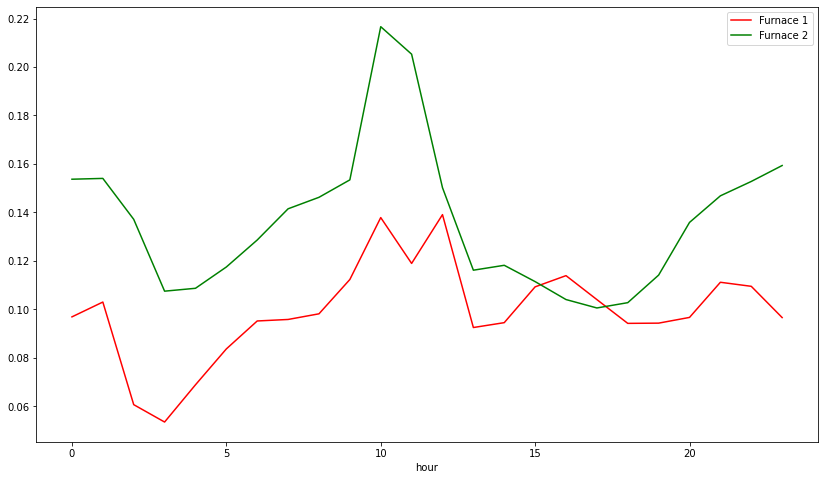

In [ ]:
visualize('hour',['Furnace 1','Furnace 2'])


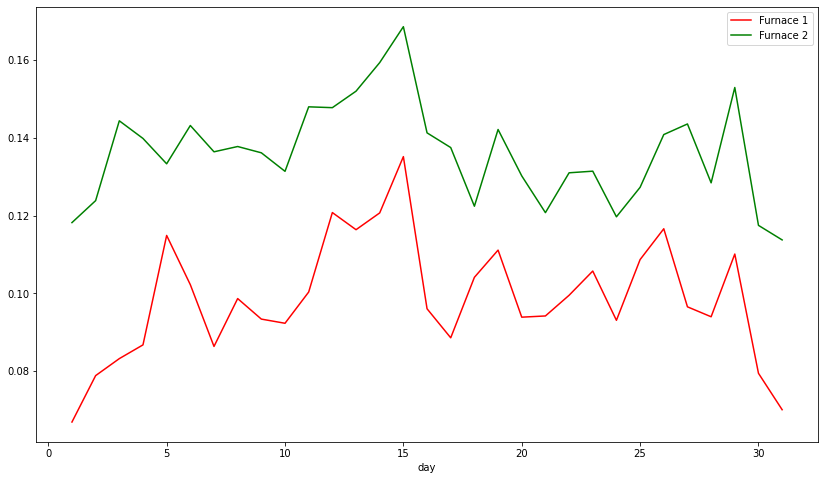

In [ ]:
visualize('day',['Furnace 1','Furnace 2'])

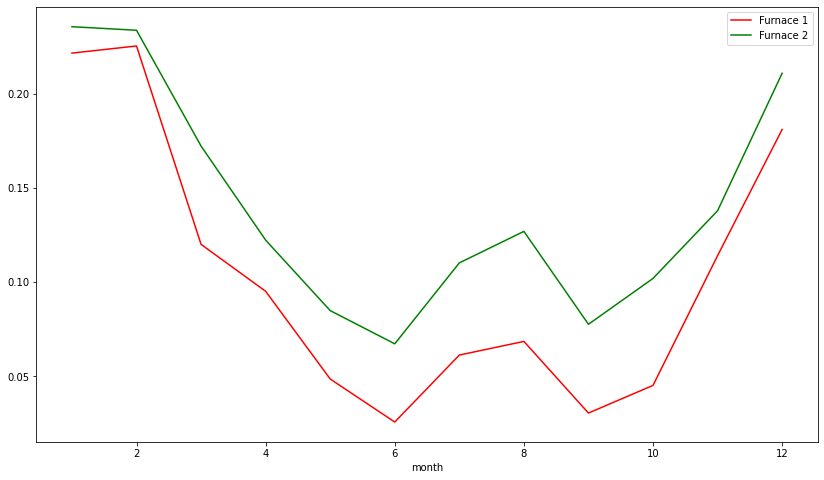

In [ ]:
visualize('month',['Furnace 1','Furnace 2'])


In [ ]:
home['Furnace']= home['Furnace 1']+home['Furnace 2']
home=home.drop(['Furnace 1','Furnace 2'], axis =1)

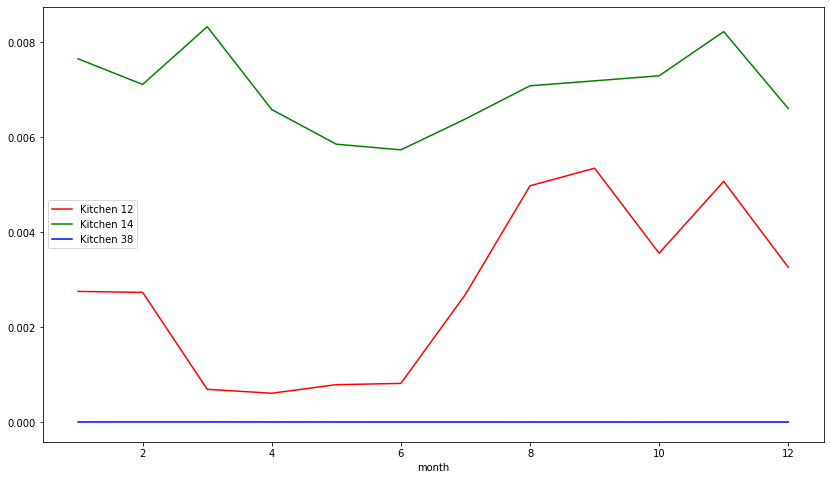

In [ ]:
visualize('month',['Kitchen 12','Kitchen 14','Kitchen 38'])


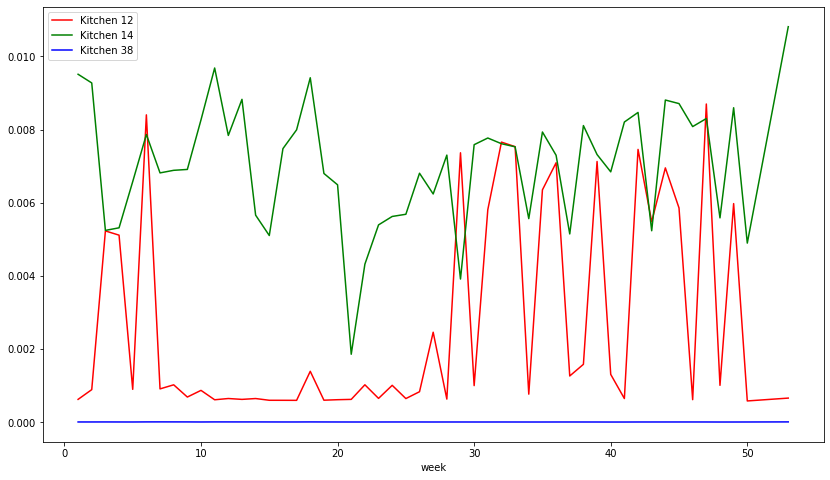

In [ ]:
visualize('week',['Kitchen 12','Kitchen 14','Kitchen 38'])


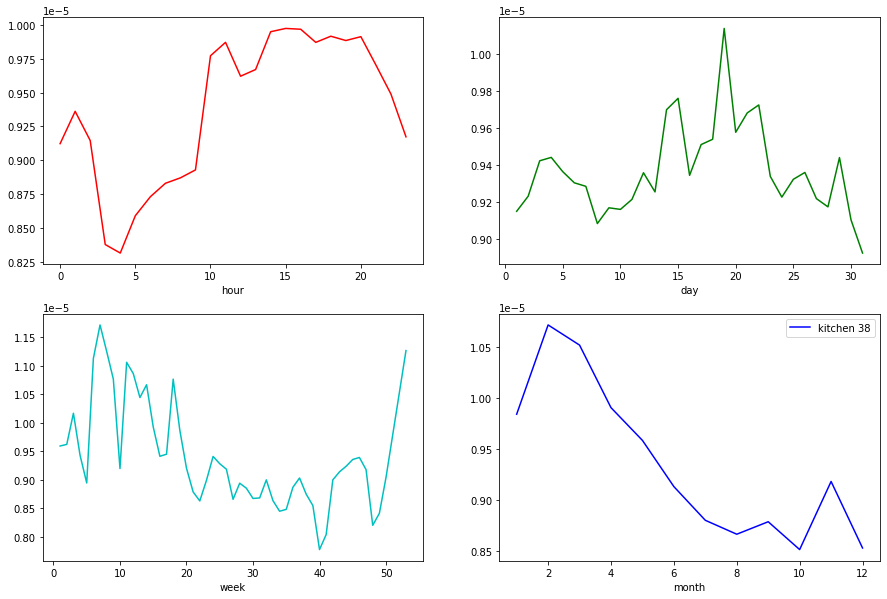

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

home.groupby('hour')['Kitchen 38'].mean().plot(ax=ax[0,0],color='red',label= 'kitchen 38')
home.groupby('day')['Kitchen 38'].mean().plot(ax=ax[0,1],color='green',label= 'kitchen 38')
home.groupby('week')['Kitchen 38'].mean().plot(ax=ax[1,0],color='c',label= 'kitchen 38')
home.groupby('month')['Kitchen 38'].mean().plot(ax=ax[1,1],color='b',label= 'kitchen 38')

                                                     

plt.legend()


In [15]:
# Separate two different Attributes
energy = home.filter(items=['use [kW]', 'gen [kW]', 'House overall [kW]', 
                                     'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 
                                     'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', 
                                     'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 
                                     'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
                                     'Microwave [kW]', 'Living room [kW]', 'Solar [kW]'])

weather = home.filter(items=['temperature','humidity', 'apparentTemperature'])


In [6]:
energy.head(5)

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
0,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483
1,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467
2,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467
3,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483
4,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467


In [10]:
weather.head(5)

,temperature,humidity,apparentTemperature
0,36.14,0.62,29.26
1,36.14,0.62,29.26
2,36.14,0.62,29.26
3,36.14,0.62,29.26
4,36.14,0.62,29.26


In [22]:
def plotPerColumnDistribution(home, nGraphShown, nGraphPerRow):
    nunique = home.nunique()
    home = home[[col for col in home if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = home.shape
    columnNames = list(home)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = home.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

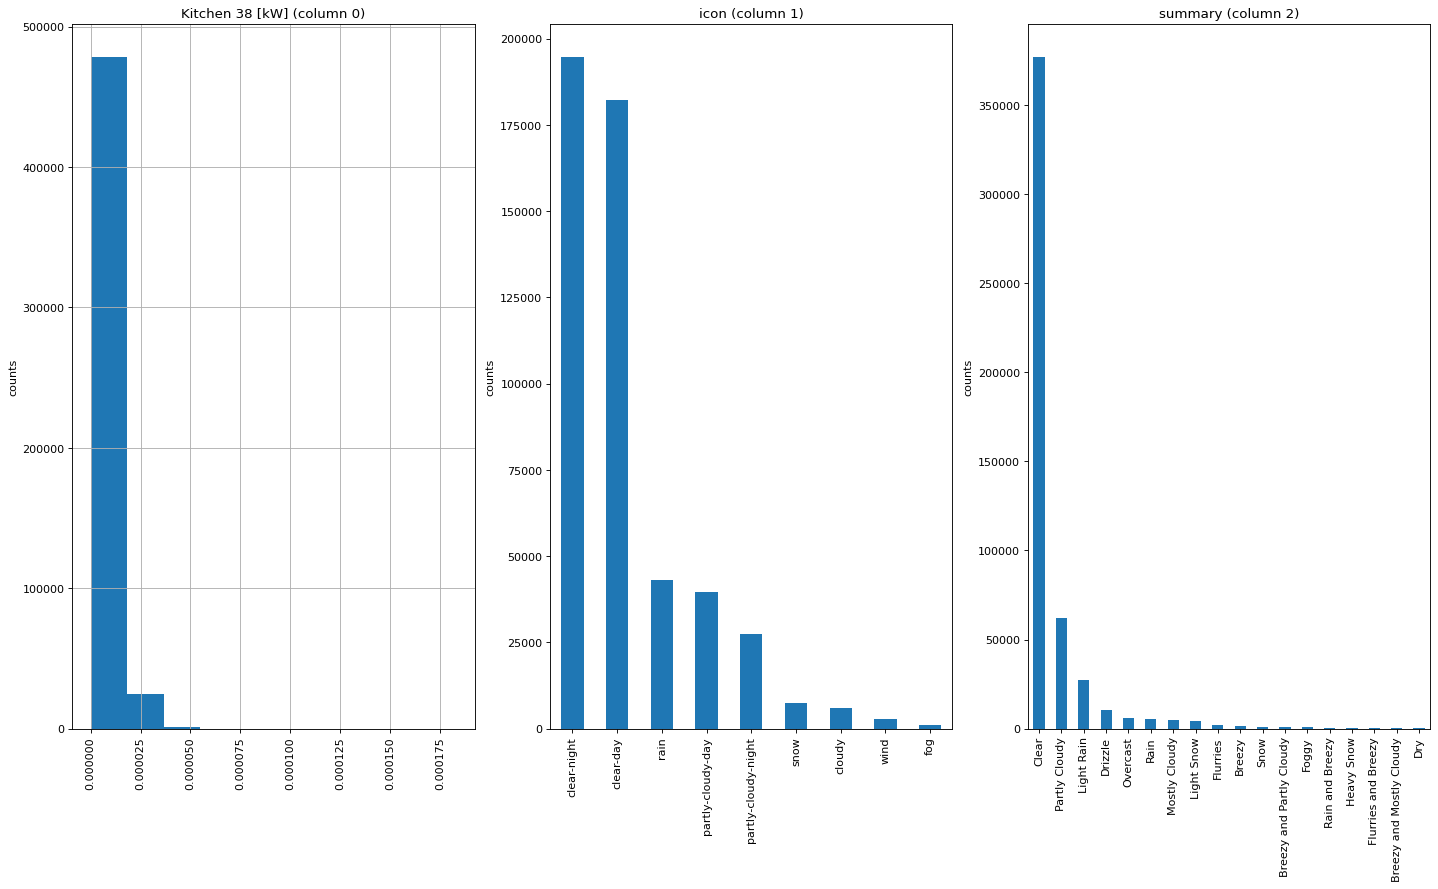

In [23]:
plotPerColumnDistribution(home, 10, 5)


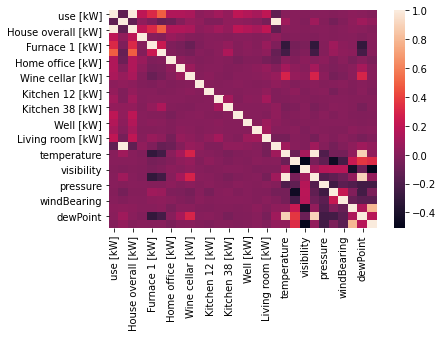

In [36]:
sns.heatmap(home.corr())

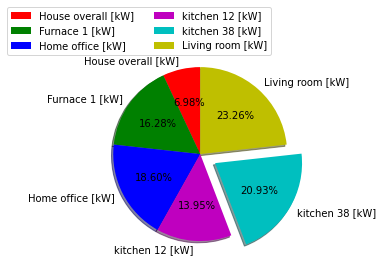

In [37]:
affect=['House overall [kW]','Furnace 1 [kW]','Home office [kW]','kitchen 12 [kW]','kitchen 38 [kW]','Living room [kW]']
color=['r','g','b','m','c','y']
slice=[3,7,8,6,9,10]

plt.pie(slice,labels=affect,colors=color,startangle=90,shadow=True,
        explode=(0,0,0,0,0.2,0),autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(0.85,1.20),ncol=2)
plt.show()

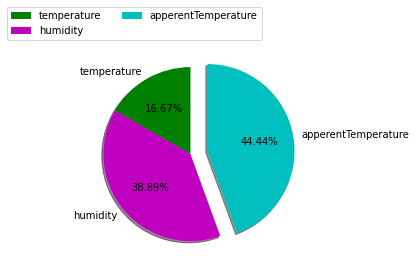

In [38]:
affect=['temperature','humidity','apperentTemperature']
color=['g','m','c']
slice=[3,7,8]

plt.pie(slice,labels=affect,colors=color,startangle=90,shadow=True,
        explode=(0,0,0.2),autopct='%1.2f%%')
plt.legend(bbox_to_anchor=(0.85,1.20),ncol=2)
plt.show()